In [1]:
import geopandas as gpd

reseau = gpd.read_file('TRONCON_ROUTE.shp')
reseau.head()

,ID_RTE500,VOCATION,NB_CHAUSSE,NB_VOIES,ETAT,ACCES,RES_VERT,SENS,NUM_ROUTE,RES_EUROPE,LONGUEUR,CLASS_ADM,geometry
0,BDCTRORO0000002223872684,Type autoroutier,b'2 chauss\xe9es',Sans objet,b'Rev\xeatu',Libre,Appartient,Double sens,A51,E712,3.18,Autoroute,"LINESTRING (894833.500 6265743.500, 894824.700..."
1,BDCTRORO0000000021530114,Type autoroutier,b'2 chauss\xe9es',Sans objet,b'Rev\xeatu',Libre,Appartient,Double sens,A51,E712,1.29,Autoroute,"LINESTRING (894051.200 6262805.500, 894038.500..."
2,BDCTRORO0000000021513443,Type autoroutier,b'2 chauss\xe9es',Sans objet,b'Rev\xeatu',b'A p\xe9age',Appartient,Double sens,A63,E5,0.32,Autoroute,"LINESTRING (340196.800 6276241.300, 340155.300..."
3,BDCTRORO0000000020678061,Type autoroutier,b'2 chauss\xe9es',Sans objet,b'Rev\xeatu',Libre,Appartient,Double sens,NaN,E501,0.25,Sans objet,"LINESTRING (433102.700 6715831.800, 433124.300..."
4,BDCTRORO0000000130924277,Type autoroutier,b'2 chauss\xe9es',Sans objet,b'Rev\xeatu',Libre,Appartient,Double sens,NaN,E501,0.11,Sans objet,"LINESTRING (433378.500 6716062.700, 433341.600..."


In [2]:
reseau.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1302758 entries, 0 to 1302757
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   ID_RTE500   1302758 non-null  object  
 1   VOCATION    1302758 non-null  object  
 2   NB_CHAUSSE  1302758 non-null  object  
 3   NB_VOIES    1302758 non-null  object  
 4   ETAT        1302758 non-null  object  
 5   ACCES       1302758 non-null  object  
 6   RES_VERT    1302758 non-null  object  
 7   SENS        1302758 non-null  object  
 8   NUM_ROUTE   596176 non-null   object  
 9   RES_EUROPE  9178 non-null     object  
 10  LONGUEUR    1302758 non-null  float64 
 11  CLASS_ADM   1302758 non-null  object  
 12  geometry    1302758 non-null  geometry
dtypes: float64(1), geometry(1), object(11)
memory usage: 129.2+ MB


In [3]:
reseau['SENS'].unique()

array(['Double sens', 'Sens direct', 'Sens inverse'], dtype=object)

In [4]:
reseau['VOCATION'].unique()

array(['Type autoroutier', 'Liaison principale', b'Liaison r\xe9gionale',
       'Bretelle', 'Liaison locale'], dtype=object)

In [5]:
reseau['CLASS_ADM'].unique()

array(['Autoroute', 'Sans objet', b'D\xe9partementale', 'Nationale'],
      dtype=object)

In [6]:
reseau.loc[~reseau['CLASS_ADM'].isin(['Autoroute', 'Sans objet', 'Nationale']), 'CLASS_ADM']='Departementale'

In [7]:
reseau['CLASS_ADM'].unique()

array(['Autoroute', 'Sans objet', 'Departementale', 'Nationale'],
      dtype=object)

In [8]:
autoroute=reseau.loc[reseau['CLASS_ADM']=='Autoroute']
nationale=reseau.loc[reseau['CLASS_ADM']=='Nationale']
departementale=reseau.loc[reseau['CLASS_ADM']=='Departementale']
autre=reseau.loc[reseau['CLASS_ADM']=='Sans objet']

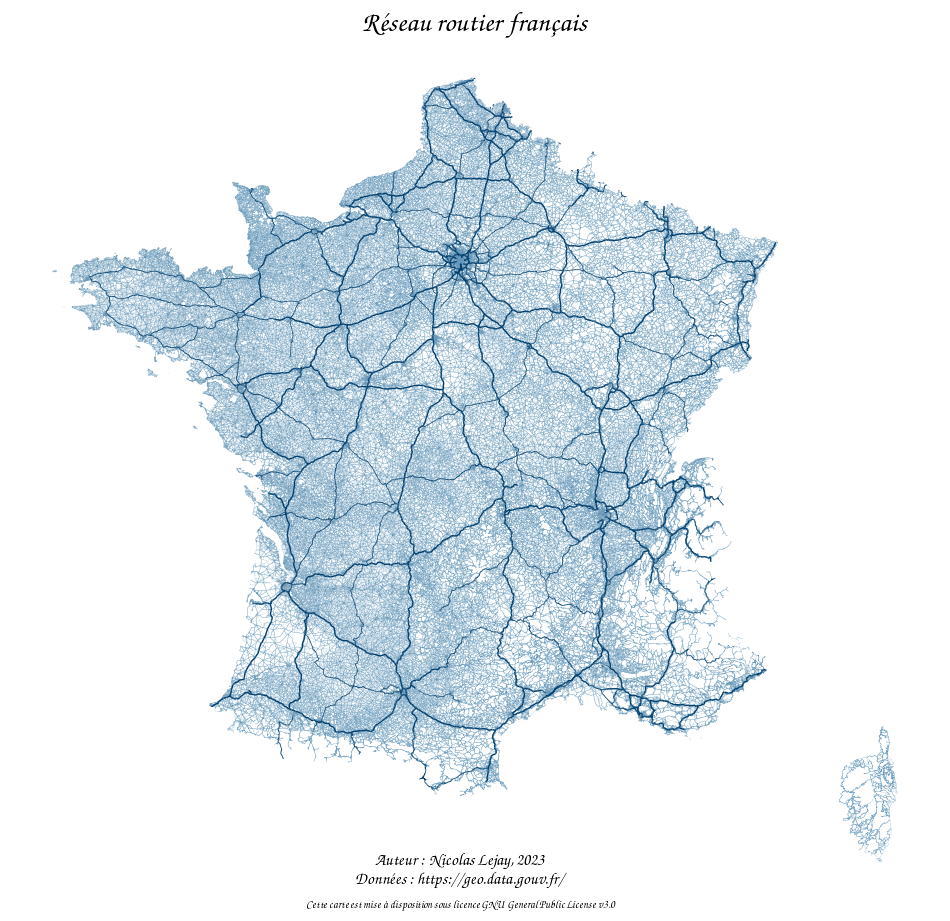

In [11]:
import matplotlib.pyplot as plt

# Changement de police de matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cursive",
    "font.cursive": "Tex Gyre Chorus"
})

#carte
fig,ax = plt.subplots(figsize=(12,12))
autre.plot(linewidth=0.1, color="#6197BB", ax=ax)
departementale.plot(linewidth=0.3, color="#6197BB", ax=ax)
nationale.plot(linewidth=0.6, color="#003F6F", ax=ax)
autoroute.plot(linewidth=1, color="#003F6F", ax=ax)

plt.title('Réseau routier français', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.figtext(0.5, 0.15, "Auteur : Nicolas Lejay, 2023\n Données : https://geo.data.gouv.fr/", fontsize=12, ha="center")
plt.figtext(0.5, 0.13, "Cette carte est mise à disposition sous licence GNU General Public License v3.0", fontsize=8, ha="center")
ax.axis('off')

carte=plt.gcf()
carte.savefig('carte_reseau_routier.jpg', bbox_inches='tight', dpi=200)
plt.show()

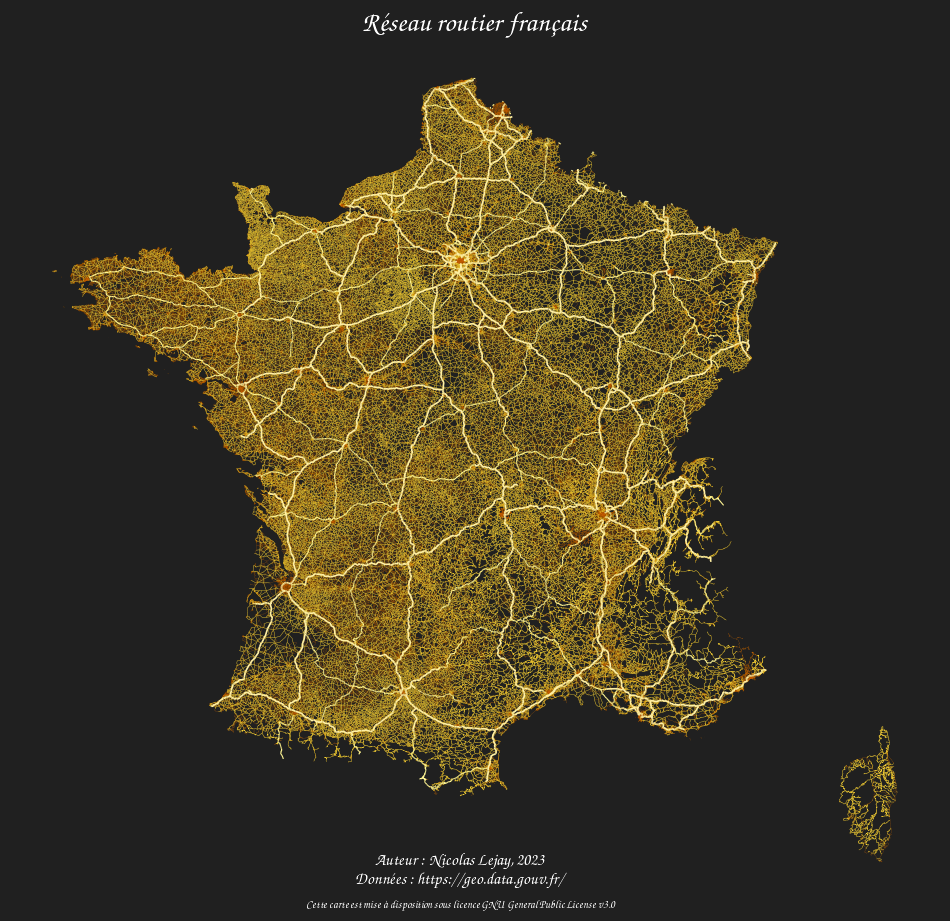

In [13]:
#carte
fig,ax = plt.subplots(figsize=(12,12), facecolor='#202020')
ax.set_facecolor('#202020')

autre.plot(linewidth=0.1, color="#F57C00", ax=ax)
departementale.plot(linewidth=0.3, color="#F8D234", ax=ax)
nationale.plot(linewidth=0.8, color="#FFF694", ax=ax)
autoroute.plot(linewidth=1.2, color="#FFF0A4", ax=ax)

plt.title('Réseau routier français', fontsize=20, color='white')
plt.xticks([])
plt.yticks([])
plt.figtext(0.5, 0.15, "Auteur : Nicolas Lejay, 2023\n Données : https://geo.data.gouv.fr/", fontsize=12, ha="center", color='white')
plt.figtext(0.5, 0.13, "Cette carte est mise à disposition sous licence GNU General Public License v3.0", fontsize=8, ha="center", color='white')
ax.axis('off')

carte=plt.gcf()
carte.savefig('carte_reseau_routier_black.jpg', bbox_inches='tight', dpi=200)
plt.show()